# Naive Bayes Classifier

## Introduction

In this project, we intend to use the Naive Bayes Classifier to analyze the attitude of the comments and classify the positive and negative comments according to their text.

Two data sets for training and testing the model are given. Each comment in data sets has a title and a body. Each comment also has a label that can be Recommended or not recommended.

Before anything, libraries that are needed in the project will be imported.

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

from hazm import *

from __future__ import unicode_literals

In [2]:
train_df = pd.read_csv('../data/train.csv')
train_df

,title,comment,recommend
0,زیبا اما کم دوام,با وجود سابقه خوبی که از برند ایرانی نهرین سرا...,not_recommended
1,بسیار عالی,بسیار عالی,recommended
2,سلام,من الان ۳ هفته هست استفاده میکنم\r\nبرای کسایی...,not_recommended
3,به درد نمیخورهههه,عمرش کمه تا یه هفته بیشتر نمیشه استفاده کرد یا...,not_recommended
4,کلمن آب,فکر کنین کلمن بخرین با ذوق. کلی پولشو بدین. به...,not_recommended
...,...,...,...
5995,جنسش عالیه,خیلی جنس پارچش نرم ولطیفه خیلیم جنسش خوبه اما ...,recommended
5996,خرید محصول,سلام.واقعا فکر نمی کردم به این راحتی اصلاح کنم...,recommended
5997,تعریف,من از دیجی کالا خریدم خیلی زود دستم رسید،زیبا،...,recommended
5998,اصلا چای ماچا نیسش,یا شرکت نمیدونسته چای ماچا امپریال چیه یا واقع...,not_recommended


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      6000 non-null   object
 1   comment    6000 non-null   object
 2   recommend  6000 non-null   object
dtypes: object(3)
memory usage: 140.8+ KB


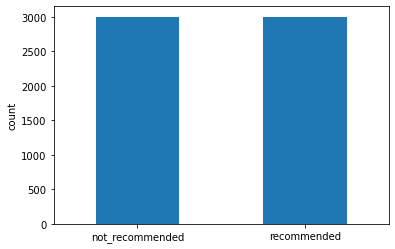

In [4]:
train_df['recommend'].value_counts().sort_index().plot(kind='bar', rot=0, ylabel='count')
plt.show()

## Phase One: Data Preprocessing

In this phase, preprocessing operations will be applied on both train and test data.
* **Types of text preprocessing techniques**
    * Normalization
    * Stopword Removal
    * Duplicate Word Removal
    * Lemmatization
    * Stemming
    * Integer Removal
    * Small Word Removal

In [5]:
class DataPreprocessor():
    def __init__(self):
        self.data = Data()
    def preprocess(self, text, text_recommend = [], preprocess = True, train = True):
        if(preprocess == True):
            out_0 = WordTokenizer().tokenize_column(TextNormalizer().normalize_column(text))
            out_1 = DuplicateWordRemover().remove_duplicate_words(out_0)
            out_2 = StopWordRemover().remove_stop_words(out_1)
            out_3 = NumberRemover().remove_numbers(out_2)
            #out_4 = SmallWordRemover().remove_small_word(out_3)
            #out_2 = TextLemmatizer().lemmatize_column(out_1)
            #out_3 = TextStemmer().stem_column(out_2)
            #out_3 = Remover().remove(out_2)           
            if(train == True):
                for comment, recommend in zip(out_2, text_recommend):
                    self.data.add_text(comment, recommend)
            return out_2
        else:
            return WordTokenizer().tokenize_column(text)
        
class Data:
    def __init__(self):
        self.recommended = {}
        self.not_recommended = {}
    def add_text(self, text, recommend):
        for word in text:
            self.add_word(word, recommend)
    def add_word(self, word, recommend):
        if recommend == 'recommended':
            if word in self.recommended.keys():
                self.recommended[word] += 1
            else:
                self.recommended[word] = 1
        else:
            if word in self.not_recommended.keys():
                self.not_recommended[word] += 1
            else:
                self.not_recommended[word] = 1
                
class TextNormalizer():
    def __init__(self):
        self.normalizer = Normalizer()
    def normalize_column(self, column):
        return column.apply(lambda row: self.normalizer.normalize(row))

class WordTokenizer():
    def tokenize_column(self, column):
        return column.apply(lambda row: word_tokenize(row))

class TextLemmatizer():
    def __init__(self):
        self.lemmatizer = Lemmatizer()
    def lemmatize_column(self, column):
        return column.apply(lambda row: [self.lemmatizer.lemmatize(token) for token in row])
    
class TextStemmer():
    def __init__(self):
        self.stemmer = Stemmer()
    def stem_column(self, column):
        return column.apply(lambda row: [self.stemmer.stem(token) for token in row])
    
class StopWordRemover():
    def remove_stop_words(self, column):
         return column.apply(lambda row: [token for token in row if(token not in stopwords_list())])

class DuplicateWordRemover():
    def remove_duplicate_words(self, column):
        return column.apply(lambda row: list(dict.fromkeys(row)))

class Remover():
    def remove(self, column):
         return column.apply(lambda row: [token[0: token.find('#')] for token in row])
        
class SmallWordRemover():
    def remove_small_word(self, column):
         return column.apply(lambda row: [token for token in row if(len(token) > 2)])

class NumberRemover():
    def remove_numbers(self, column):
         return column.apply(lambda row: [token for token in row if(not isinstance(token, int))])

**Explanation and analysis of replacing words by stemming and lemmatization**

**Stemming**

Stemming is the process of reducing inflection in words to their root form. In this case, the “root” may not be a real root word but just a canonical form of the original word. Stemming uses a simple heuristic process that cuts off the ends of words in the hope of correctly converting words into its root form. For stemming, we use hazm library.

**Effects of stemming**

Stemming only marginally helped improve classification accuracy when it is compared with using better-engineered features.

**Lemmatization**

Lemmatization on the surface is very similar to stemming, where the purpose is to remove inflections and map a word to its root form. The only difference is that lemmatization tries to do it the proper way. It doesn’t just chop things off. It converts words to the actual root.

**Effects of Lemmatization**

Lemmatization provides no notable benefit over stemming for text classification purposes in this case. Moreover, it is slower.

In [6]:
test_df = pd.read_csv('../data/test.csv')
test_df

,title,comment,recommend
0,وری گود,تازه خریدم یه مدت کار بکنه مشخص میشه کیفیت قطعاتش,recommended
1,زیاد مناسب نیست رنگ پس میده یه وقتایی موقع نوشتن,با این قیمت گزینه های بهتری هم میشه گرفت.\r\nر...,not_recommended
2,پنکه گوشی,خیلی عالیه، فقط کاش از اون سمتش میشد به پاوربا...,recommended
3,دستگاه خیلی ضعیف,من این فیس براس چند روز یپش به دستم رسید و الا...,not_recommended
4,عالی و بیست,بنده یه هارد اکسترنال دارم که کابل فابریکش سال...,recommended
...,...,...,...
795,بسیار کوچیک,طراحیش قشنگه ولی داخل عکس خیلی بزرگتر ب چشم م...,not_recommended
796,لامپ چینی,این لامپ چینی هستتش کیفیت پایین . نور کم و فاق...,not_recommended
797,خوب بود,در کل از این خریدم راضی هستم و به تناسب قیمتش ...,recommended
798,کیفیت خوبی داره,تازع نصبش کردم-سرعت انتقال و نصب بازی روش عالی...,recommended


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      800 non-null    object
 1   comment    800 non-null    object
 2   recommend  800 non-null    object
dtypes: object(3)
memory usage: 18.9+ KB


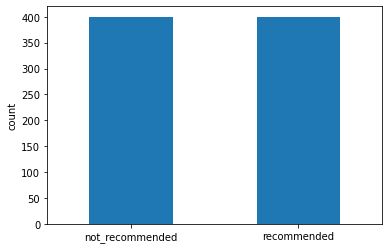

In [8]:
test_df['recommend'].value_counts().sort_index().plot(kind='bar', rot=0, ylabel='count')
plt.show()

In [9]:
recommend_df = test_df['recommend'].copy()

In [10]:
data_processor = DataPreprocessor()
preprocessed_data = data_processor.preprocess(test_df['comment'], [], True, False)

## Phase Two: Modeling the Problem

\\( P(c|x) = \frac{P(x|c) \times P(c)}{P(x)} \\)

- **Posterior:** Probability of comment x being classified in class c.
- **Likelihood:** This is the probability that comment (x) occurs given that the comment is in class c. To calculate this probability, we Multiply P(words in this text | c).
- **Prior:** How much initially we believed that the comment would be classified in this class. In other words, it is the probability that a comment is in class c. To calculate this probability, we need to count the number of comments in this class over the total number of comments.
- **Evidence:** This is the probability that the comment occurs overall.

One of the shortcomings of Naive Bayes is the assumption of independent predictor features. Rather than calculating each attribute value's probabilities, they are assumed to be conditionally independent. In other words, the attributes do not interact with each other, given the class value. 

### Additive Smoothing

In statistics, Additive Smoothing, also called Laplace Smoothing or Lidstone smoothing, is used primarily for scenarios when you expect to see attributes that weren't present in the training data set. This scenario is more relevant when classifying text. Additive Smoothing assures that even though a word was not present in a particular class in the training set, that doesn't mean that it will not be present in that particular class in any unseen data. The same thing applies if a word was not present in both classes in the training set. In other words, Additive Smoothing by adding a small value to that probability makes sure that the probability of that word presenting in that class is not 0. This small value is Additive Smoothing.

## Phase Three: Evaluation

To evaluate results, we use these four models:

\\(Accuracy = \frac{Correct Detected}{Total} \\)

\\(Precision = \frac{Correct Detected Recommended}{All Detected Recommended (Including Wrong Ones)} \\)

\\(Recall = \frac{Correct Detected Recommended}{Total Recommended} \\)

\\(F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall)} \\)

**Correct Detected Recommended:** The number of comments that have been correctly classified as recommended.

**All Detected Recommended:** The number of all comments that have been classified as recommended.

**Total Recommended:** The number of all comments that were recommended in the test dataset.

**Why the Precision and Recall each alone is not enough to evaluate the model?**

**Precision:**

For example, suppose we only classify one word as recommended. In that case, Precision will be 1.0, but we know we didn't classify many words correctly, yet because Precision is 1.0, we might evaluate that the model is great.

\\(Correct Detected = 1 \\)

\\(All Detected Recommended = 1 \\)

\\(Total Recommended >> 1 \\)

\\(Precision = \frac{Correct Detected Recommended}{All Detected Recommended (Including Wrong Ones)} = \frac{1}{1} = 1.0 \\)

**Recall:**

For example, if we classify all words as recommended, then Recall will be 1.0, but we know we didn't classify many words correctly, yet because Recall is 1.0, we might evaluate that the model is great.

Because of above examples we can't use only one of the them to evaluate our model.

\\(Correct Detected = d \\)

\\(All Detected Recommended > d \\)

\\(Total Recommended = d \\)

\\(Recall = \frac{Correct Detected Recommended}{Total Recommended} = \frac{d}{d} = 1.0 \\)

**What kind of mediation between Precision and Recall is used in F1 criterion?**

F1 score is the harmonic mean of precision and recall:

\\(F1 = \frac{2}{Recall ^ {-1} + Precision ^ {-1}} = 2 \times \frac{Precision \times Recall}{Precision + Recall} \\)

**What is the reason?**

We use a harmonic mean instead of arithmetic mean because it punishes extreme values. Here is an example:

\\(Precision = 1.0 \\)

\\(Recall = 0.0 \\)

\\(Simple Average = \frac{Recall + Precision}{2} = \frac{0.0 + 1.0}{2} = 0.5 \\)

\\(F1 = \frac{2}{Recall ^ {-1} + Precision ^ {-1}} = 2 \times \frac{Precision \times Recall}{Precision + Recall} = 2 \times \frac{1.0 \times 0.0}{1.0 + 0.0} = 0 \\)

A classifier that has precision of 1.0 and a recall of 0.0 has a simple average of 0.5 but an F1 score of 0.

In [11]:
class NavieBayes:
    def __init__(self, train_df, alpha = 1, additive_smoothing = True):
        self.data = DataPreprocessor()
        self.trained_data = self.data.preprocess(train_df['comment'], train_df['recommend'])
        self.alpha = alpha
        self.additive_smoothing = additive_smoothing
    def classify(self, preprocessed_data, test_df):
        number_features = len(self.data.data.recommended.keys()) + len(self.data.data.not_recommended.keys())
        index = 0
        for comment in preprocessed_data:
            p_recommended = len([x for x in recommend_df if(x == 'recommended')]) / recommend_df.count()
            p_not_recommended = len([x for x in recommend_df if(x == 'not_recommended')]) / recommend_df.count()
            for word in comment:
                number_word_recommended = 0
                number_word_not_recommended = 0
                if word in self.data.data.recommended.keys():
                    number_word_recommended = self.data.data.recommended[word]
                if word in self.data.data.not_recommended.keys():
                    number_word_not_recommended = self.data.data.not_recommended[word]
                number_word = number_word_recommended + number_word_not_recommended
                if(self.additive_smoothing == True):
                    number_word = number_word_recommended + number_word_not_recommended
                    p_recommended *= (number_word_recommended + self.alpha) / (number_features * self.alpha + number_word)
                    p_not_recommended *= (number_word_not_recommended + self.alpha) / (number_features * self.alpha + number_word)
                elif(number_word != 0):
                    p_recommended *= number_word_recommended / number_word
                    p_not_recommended *= number_word_not_recommended / number_word    
            if p_recommended >= p_not_recommended:
                test_df['recommend'][index] = 'recommended'
            else:
                test_df['recommend'][index] = 'not_recommended'
            index += 1
        return test_df['recommend']

In [12]:
test_df['recommend'] = NavieBayes(train_df, 1, True).classify(preprocessed_data, test_df)

In [13]:
def count_all_recommended_detected(df):
    counter = 0
    for i in df['recommend']:
        if i == 'recommended':
            counter += 1
    return counter

def count_correct_recommended_detected(df, recommend):
    counter = 0
    for i in range(len(df['recommend'])):
        if df['recommend'][i] == recommend[i] and recommend[i] == 'recommended':
            counter += 1
    return counter

def count_correct_not_recommended_detected(df, recommend):
    counter = 0
    for i in range(len(df['recommend'])):
        if df['recommend'][i] == recommend[i] and recommend[i] == 'not_recommended':
            counter += 1
    return counter

all_recommended_detected = count_all_recommended_detected(test_df)
correct_recommended_detected = count_correct_recommended_detected(test_df, recommend_df)
correct_not_recommended_detected = count_correct_not_recommended_detected(test_df, recommend_df)

print(f"all recommended detected:\t{all_recommended_detected}")
print(f"correct recommended detected:\t{correct_recommended_detected}")
print(f"total recommended:\t\t{len([x for x in recommend_df if(x == 'recommended')])}")

all recommended detected:	443
correct recommended detected:	385
total recommended:		400


In [14]:
def get_accuracy(correct_recommended_detected, correct_not_recommended_detected, recommend_df):
    return (correct_recommended_detected + correct_not_recommended_detected) / recommend_df.count()

def get_precision(correct_recommended_detected, all_recommended_detected):
    return correct_recommended_detected / all_recommended_detected

def get_recall(correct_recommended_detected, recommend_df):
    return correct_recommended_detected / len([x for x in recommend_df if(x == 'recommended')])

def get_f1(precision, recall):
    return 2 * (precision * recall) / (precision + recall)
accuracy = get_accuracy(correct_recommended_detected, correct_not_recommended_detected, recommend_df)
precision = get_precision(correct_recommended_detected, all_recommended_detected)
recall = get_recall(correct_recommended_detected, recommend_df)
f1_score = get_f1(precision, recall)

print(f'accuracy:\t{accuracy}')
print(f'precision:\t{precision}')
print(f'recall:\t\t{recall}')
print(f'f1-score:\t{f1_score}')

accuracy:	0.90875
precision:	0.8690744920993227
recall:		0.9625
f1-score:	0.9134045077105575


| Case | Accuracy | Precision | Recall |   F1   |
|:----:|:--------:|:---------:|:------:|:------:|
|   Using Preprocessing and Additive Smoothing   |  0.9087  |   0.8690  | 0.9625 | 0.9134 |
|   Using Additive Smoothing  |  0.8737  |   0.8174  | 0.9625 | 0.8840 |
|   Using Preprocessing  |  0.8850  |   0.8407  | 0.9500 | 0.8920 |
|   Using nothing  |  0.8575  |   0.8016  | 0.9500 | 0.8695 |

| Case | Total | Total Recommended | All Detected Recommended | Correct Detected Recommended |
|:----:|:-----:|:-----------------:|:------------------------:|:----------------------------:|
|   Using Preprocessing and Additive Smoothing  |  800  |        400        |            443           |              385             |
|   Using Additive Smoothing  |  800  |        400        |            471           |              385             |
|   Using Preprocessing  |  800  |        400        |            452           |              380             |
|   Using nothing  |  800  |        400        |            474           |              380             |

**Analysis of the values reached in the previous section**

Preprocess is more important than additive smoothing, but each of has its own advantages.

In [15]:
test_df[(test_df['recommend'] != recommend_df)].head()

,title,comment,recommend
0,وری گود,تازه خریدم یه مدت کار بکنه مشخص میشه کیفیت قطعاتش,not_recommended
1,زیاد مناسب نیست رنگ پس میده یه وقتایی موقع نوشتن,با این قیمت گزینه های بهتری هم میشه گرفت.\r\nر...,recommended
8,نقد پس از خرید,سلام ، راحت شدم از کابل شارژ ، توصیه میشود به ...,not_recommended
28,محصول ضعیفی هست,بدون پخش بو و ماندگاری زیاد امیدوارم کیفیتش رو...,recommended
37,هرگز نخرید,فشار زیاد به دست\r\nمدت زمان اندازه گیری فشار\...,recommended


**How to improve shortcomings of this classification**
* In Naive Bayes, we assume that the attributes do not interact with each other. In other words that they are independent. In real life, this never occurs by considering the associations between features that would improve the classification.
* Another factor is the train data. The size and its contents determine the outcome of the classification. By making the set larger and more diverse, we can improve the classification.
* Although additive smoothing is used overall, Zero Frequency is one of the problems of Naive Bayes, and maybe by using other smoothing techniques, we can improve the classification.